In [7]:
import os, json
import numpy as np

lst = []
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        initial_prompt = list(data[k]["initial_prompt"].keys())[0]
        optimized_prompt = list(data[k]["optimized_prompt"].keys())[0]
                
        delta = optimized_prompt_score - initial_prompt_score
        # NOTE: 5 prompts misclassified as improved. Although delta > 0, the initial prompt == optimized prompt.
        # if initial_prompt == optimized_prompt and delta > 0:
        #     count += 1
        #     lst.append(k)
        
        # if delta > 0 and initial_prompt != optimized_prompt:
        #     count += 1
        #     lst.append(k)

        if -0.1 <= delta <= 0.1:
            lst.append(k)

len(lst), lst

(18,
 ['Help summarize the article.: PLACEHOLDER',
  'You are a dad-joke assistant. Reply with a funny dad-joke related to the transcription below:\nPLACEHOLDER',
  'Please take nicely formatted notes on the following lecture transcript:\n\nPLACEHOLDER',
  'Review this legal document excerpt for any elements that seem legally unfair under US law "PLACEHOLDER"',
  'In one word only tell me the mood or sentiment of the following text? "PLACEHOLDER"',
  'Make a code review of the changes made in this diff: PLACEHOLDER',
  'You are a great Ingredient Parser who can extract ingredients from a given food label text.\n    Extract the ingredients from the following food_label:\n    FOOD LABEL: {food_label}',
  'Write a concise summary of the following:\n    "{text}"\n    in point form. CONCISE SUMMARY:',
  'Please come up with a title for a YouTube video on the  {subject}.',
  'explain the following topic to a UG student in a conventional way.\n\n Topic: PLACEHOLDER',
  'Please provide a detai

In [4]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[-8.57142857142857, 55.714285714285715, 0.0, -1.4285714285714164, -1.4285714285714448, -7.142857142857139, 1.4285714285714164, 0.0, 2.857142857142861, 42.85714285714286, 7.142857142857139, 1.4285714285714164, 21.42857142857143, 0.0, 0.0, 5.714285714285708, 0.0, 0.0, -5.714285714285708, 0.0, 28.571428571428573, -1.4285714285714448, 2.857142857142861, 44.28571428571429, 0.0, 0.0, 0.0, 1.4285714285714164, -1.4285714285714164, 1.4285714285714164, 0.0, 6.060606060606062, 7.142857142857153, 0.0, 0.0, 12.857142857142856, 0.0, 2.857142857142861, 31.42857142857143, 0.0, 0.0, 0.0, 7.142857142857139, 0.0]
Avg change: 5.85202676111767
Std: 13.688235744229695
95% CI: 4.044615196857299


In [5]:
temp = np.array(deltas)
print(f"Number of prompts that worsened: {len(temp[temp < 0])}")
print(f"Number of prompts that improved: {len(temp[temp > 0])}")
print(f"Number of prompts that stayed the same: {len(temp[temp == 0])}")


Number of prompts that worsened: 7
Number of prompts that improved: 19
Number of prompts that stayed the same: 18


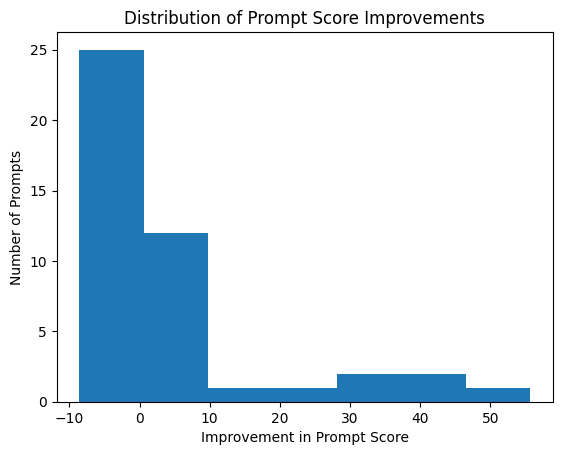

In [6]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()